## Model Color Reject

In [1]:
import cv2 
import joblib
import pyfeats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def improc1(image):      
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ROIPos = [[1220,1100],[2050,1900]]
    imageROI = imageGray[ROIPos[0][1]:ROIPos[1][1], ROIPos[0][0]:ROIPos[1][0]]
    
    th_image = imageROI
    th_value = 120
    th_image[th_image > th_value] = 255
    
    # plt.imshow(th_image, cmap='gray') 
    # plt.axis('off')
    # plt.show()
    return th_image

def Uneven(image):
    H, labels = pyfeats.histogram(image, mask=None, bins=256)
    hist = H[0:122]
    hist_norm = hist/hist.sum()
    mean = np.mean(hist_norm)
    variance = np.var(hist_norm)
    skewness = np.mean((hist_norm - mean) ** 3)
    kurtosis = np.mean((hist_norm - mean) ** 4)
    energy = np.sum(hist_norm ** 2)
    entropy = -np.sum(hist_norm * np.log(hist_norm + np.finfo(float).eps))
    contrast = np.sum((np.arange(122) - mean) ** 2 * hist_norm)
    combined_features = np.concatenate((variance,skewness,kurtosis,energy,entropy,contrast), axis=None)
    reshape = combined_features.reshape(1,-1)
    return reshape

def model_uneven(image):
    model_1 = joblib.load('../Avent_Model/Model_Uneven_RF.h5')
    pca_1 = joblib.load('../Avent_Model/PCA_Model_Uneven.pkl')
    
    proc1 = improc1(image)
    feature = Uneven(proc1)
    
    X1 = pca_1.transform(feature)
    
    pred = model_1.predict(X1)
    
    if pred == [0]:
        kesimpulan = 'Good'
    else :
        kesimpulan = "Reject"

    return kesimpulan
    
    
# image_good = cv2.imread('../study_oktober/good/GOOD_AVENT20230728143322537390.jpg')
# image_reject = cv2.imread('../study_oktober/color/Reject_AVENT20230730111829635198.jpg')
# model_uneven(image_good)

c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Model OverPrint Reject

In [2]:
import cv2 
import joblib
import pyfeats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def improc2(image):      
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ROIPos = [[1220,1100],[2050,1900]]
    imageROI = imageGray[ROIPos[0][1]:ROIPos[1][1], ROIPos[0][0]:ROIPos[1][0]]
    
    th_image = imageROI
    th_value = 120
    th_image[th_image > th_value] = 255
    
    # plt.imshow(th_image, cmap='gray') 
    # plt.axis('off')
    # plt.show()
    return th_image

def Smudging(image):
    features, labels = pyfeats.hu_moments(image)
    H, labels = pyfeats.histogram(image, mask=None, bins=256)
    hist = H[0:122]
    hist_norm = hist/hist.sum()
    mean = np.mean(hist_norm)
    variance = np.var(hist_norm)
    skewness = np.mean((hist_norm - mean) ** 3)
    kurtosis = np.mean((hist_norm - mean) ** 4)
    energy = np.sum(hist_norm ** 2)
    entropy = -np.sum(hist_norm * np.log(hist_norm + np.finfo(float).eps))
    contrast = np.sum((np.arange(122) - mean) ** 2 * hist_norm)
    combined_features = np.concatenate((features,variance,skewness,kurtosis,energy,entropy,contrast), axis=None)
    reshape = combined_features.reshape(1,-1)
    return reshape

def model_Smudging(image):
    model_2 = joblib.load('../Avent_Model/Model_Smudging_RF.h5')
    pca_2 = joblib.load('../Avent_Model/PCA_Model_Smudging.pkl')
    
    proc2 = improc2(image)
    feature = Smudging(proc2)
    
    X2 = pca_2.transform(feature)
    
    pred = model_2.predict(X2)
    
    if pred == [0]:
        kesimpulan = 'Good'
    else :
        kesimpulan = "Reject"

    return kesimpulan
    
    
# image_good = cv2.imread('../study_oktober/good/GOOD_AVENT20230728143322537390.jpg')
# image_reject = cv2.imread('../study_oktober/reject/Reject_AVENT20230728171234737002.jpg')
# model_Smudging(image_good)

## Model MissPrint Reject

In [3]:
import cv2 
import joblib
import pyfeats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def improc3(image):      
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ROIPos = [[800,900],[2450,2250]]
    imageROI = imageGray[ROIPos[0][1]:ROIPos[1][1], ROIPos[0][0]:ROIPos[1][0]]
    
    th_image = imageROI
    # th_value = 120
    # th_image[th_image > th_value] = 255
    
    # plt.imshow(th_image, cmap='gray') 
    # plt.axis('off')
    # plt.show()
    return th_image

def MissPrint(image):
    features, labels = pyfeats.hu_moments(image)
    reshape = features.reshape(1,-1)
    return reshape

def model_MissPrint(image):
    model_3 = joblib.load('../Avent_Model/model_MissPrint_LD.h5')
    pca_3 = joblib.load('../Avent_Model/PCA_model_Missprint.pkl')
    
    proc3 = improc3(image)
    feature = MissPrint(proc3)
    
    X3 = pca_3.transform(feature)
    
    pred = model_3.predict(X3)
    
    if pred == [0]:
        kesimpulan = 'Good'
    else :
        kesimpulan = "Reject"

    return kesimpulan
    
    
# image_good = cv2.imread('../study_oktober/good/GOOD_AVENT20230728143322537390.jpg')
# image_reject = cv2.imread('../study_oktober/reject/GOOD_AVENT20230728165811097323.jpg')
# model_MissPrint(image_good)

## Visual Checking Detection

In [10]:
import time

def cek_botol(image):
    start_time = time.time()
    result_1 = model_uneven(image)
    result_2 = model_Smudging(image)
    result_3 = model_MissPrint(image)

    if result_1 == 'Reject' or result_2 == 'Reject' or result_3 == 'Reject':
        kesimpulan = "Botol Reject"
    else:
        kesimpulan = "Botol Good"

    waktu = time.time() - start_time

    print("    AI Vision System     ")
    print("------------------------------------")
    print("")
    print("Uneven Fill     : ", result_1)
    print("Over Print      : ", result_2)
    print("Miss Print      : ", result_3)
    print("")
    print("------------------------------------")
    print("Result : ", kesimpulan)
    print("Cycle Time", "{:.2f}".format(waktu), "detik")
    
    return kesimpulan

image_good = cv2.imread('../Avent_Model/good/GOOD_AVENT20230728150807634159.jpg')
image_reject = cv2.imread('../Avent_Model/reject/GOOD_AVENT20230728143713388597.jpg')

cek_botol(image_good)


    AI Vision System     
------------------------------------

Uneven Fill     :  Good
Over Print      :  Good
Miss Print      :  Good

------------------------------------
Result :  Botol Good
Cycle Time 0.16 detik


c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


'Botol Good'

In [12]:
import os
import cv2
import time
import pandas as pd

# image_folder = '../study_oktober/reject/'  
results_reject = []
correct_detection = 0
total_detection = 0
number = 1
category = 'good'
path = '../Avent_Model/good/'
for file in os.listdir(path):
    if file.endswith('.jpg'):
        nameFile = os.path.join(path, file)
        image = cv2.imread(nameFile)  # Baca gambar
        
        start_time = time.time()
        result = cek_botol(image)  # Evaluasi gambar
        waktu = time.time() - start_time
        
        results_reject.append({
            'number' : number,
            'filename': nameFile,
            'category': category,
            'result': result,
            'processing_time': waktu
        })
        if result == category:
            correct_detection += 1
        total_detection += 1
        number +=1

reject_df = pd.DataFrame(results_reject)
reject_df.to_csv('hasil_evaluasi_Good_Final.csv', index=False)


c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\320234701\AppData\Local\anaconda3\Lib\site-packages\skle

Accuracy for Good: 90.62%
Accuracy for Reject: 94.09%
Overall Accuracy: 92.79%


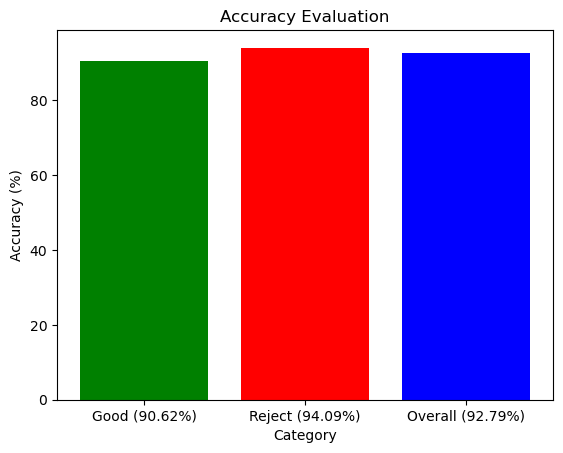

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca hasil evaluasi Good
good_df = pd.read_csv('hasil_evaluasi_Good_Final.csv')
# Baca hasil evaluasi Reject
reject_df = pd.read_csv('hasil_evaluasi_Reject_Final.csv')

# Hitung akurasi untuk kategori Good
total_good_detection = len(good_df)
correct_good_detection = sum(good_df['result'] == 'Botol Good')
accuracy_good = (correct_good_detection / total_good_detection) * 100

# Hitung akurasi untuk kategori Reject
total_reject_detection = len(reject_df)
correct_reject_detection = sum(reject_df['result'] == 'Botol Reject')
accuracy_reject = (correct_reject_detection / total_reject_detection) * 100

print(f'Accuracy for Good: {accuracy_good:.2f}%')
print(f'Accuracy for Reject: {accuracy_reject:.2f}%')

# Hitung akurasi keseluruhan
total_detection = total_good_detection + total_reject_detection
correct_detection = correct_good_detection + correct_reject_detection
overall_accuracy = (correct_detection / total_detection) * 100

# Cetak akurasi keseluruhan
print(f'Overall Accuracy: {overall_accuracy:.2f}%')

# Buat plot
categories = ['Good', 'Reject', 'Overall']
accuracies = [accuracy_good, accuracy_reject, overall_accuracy]

# Persiapkan teks label
labels = [f'{cat} ({acc:.2f}%)' for cat, acc in zip(categories, accuracies)]

plt.bar(categories, accuracies, color=['green', 'red', 'blue'])
plt.xlabel('Category')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Evaluation')
plt.xticks(categories, labels)

plt.show()